In [131]:
#CNN = Rede Neural Convolucional
#importação das bibliotecas utilizadas
import tensorflow 
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np

In [132]:
#importa o dataset de dígitos 
dataset = keras.datasets.mnist
((imagens_treino, classes_treino), (imagens_teste, classes_teste)) = dataset.load_data()

imagens de Treino: 60000
imagens de Treino: (60000, 28, 28)
imagens de Teste: (10000, 28, 28)
classes de Treino: (60000,)
min:  0
max:  9


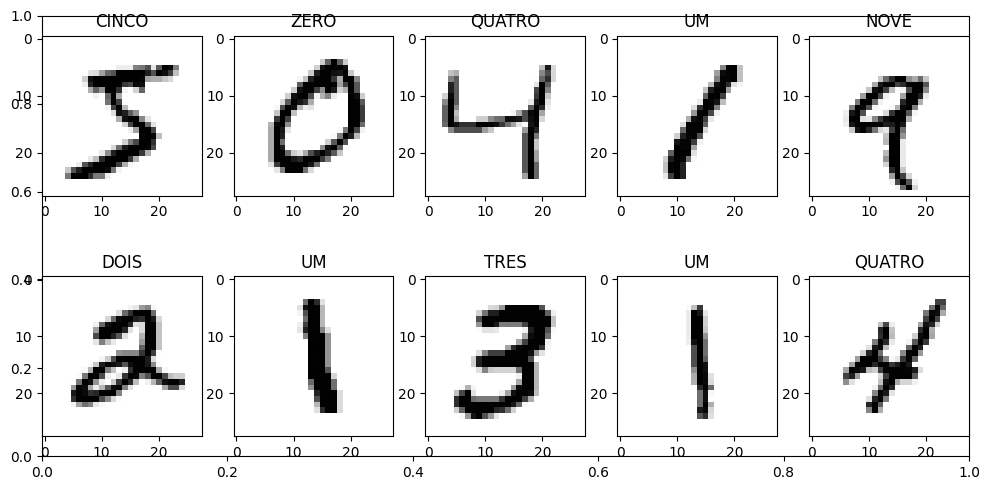

In [133]:
print("imagens de Treino:" ,len(imagens_treino))
print("imagens de Treino:" ,imagens_treino.shape)
print("imagens de Teste:" ,imagens_teste.shape)
print("classes de Treino:" ,classes_treino.shape)

print("min: ", classes_treino.min())
print("max: ", classes_treino.max())

nomes_de_classificacoes = ['ZERO', 'UM', 'DOIS', 'TRES', 'QUATRO', 'CINCO', 'SEIS', 'SETE', 'OITO', 'NOVE']

total_de_classificacoes=10

fig, axes = plt.subplots(figsize=(10,5))
fig.tight_layout()

for imagem in range(10):
   plt.subplot(2, 5, imagem+1)
   plt.imshow(imagens_treino[imagem], cmap='binary')
   plt.title(nomes_de_classificacoes[classes_treino[imagem]])

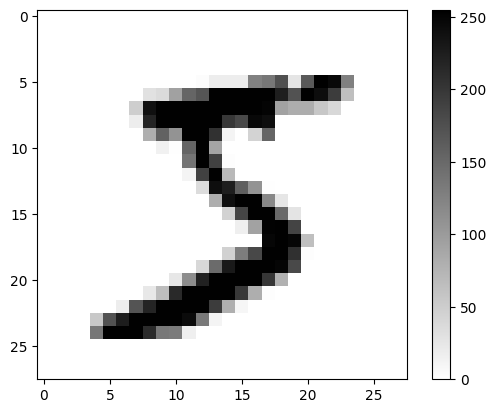

In [134]:
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()

In [135]:
print(imagens_treino.shape)
imagens_treino = imagens_treino.reshape((imagens_treino.shape[0],28,28,1))#redefino o formato para 1 vetor
imagens_teste = imagens_teste.reshape((imagens_teste.shape[0],28,28,1))#[0] é o 60000
print(imagens_treino.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [136]:
#normalização
imagens_treino = imagens_treino/255
#Convolução 2D => 32 = KERNELS, (3,3) =tamanho do kernel, input = (imagem 28x28 o 1 é obrigatório da biblioteca, já está em escala de cinza), função de ativação = relu(entrada negativa? converte em zero e o neuronio não é carregado)
modelo = keras.Sequential([keras.layers.Conv2D(32,(3,3), input_shape=(28,28,1), activation=tensorflow.nn.relu),
                           keras.layers.MaxPooling2D((2,2)),#trata a questão de diversos angulos da imagem
                           keras.layers.Flatten(),#transforma a imagem 28x28 em 1D para a entrada
                           keras.layers.Dense(100, activation=tensorflow.nn.relu),#camada oculta
                           keras.layers.Dense(50, activation=tensorflow.nn.relu),#camada oculta
                           keras.layers.Dropout(0.2),#barra o overfitting
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)#na essencia dá a probabilidade de a entrada estar em uma determinada classe
                           ])
#compila
adam=keras.optimizers.Adam(lr=0.5)
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [137]:
hist=modelo.fit(imagens_treino, classes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2336 - accuracy: 0.9280 - val_loss: 0.0827 - val_accuracy: 0.9760
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.0646 - val_accuracy: 0.9811
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0496 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0561 - val_accuracy: 0.9843
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0638 - val_accuracy: 0.9838
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.0594 - val_accuracy:

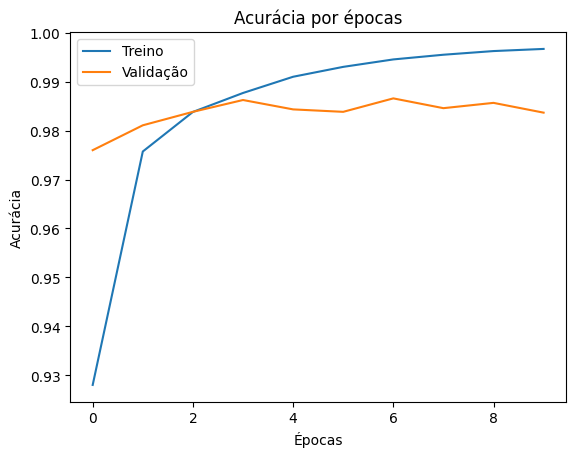

In [138]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

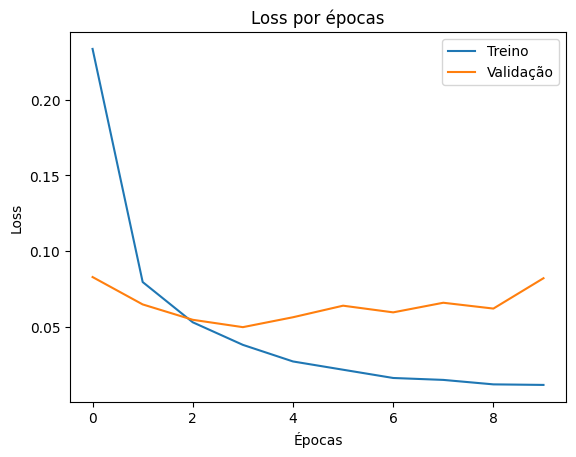

In [139]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])

In [140]:
model_json = modelo.to_json()
with open("model.json", "w") as json_file:
   json_file.write(model_json)

modelo.save_weights("model.h5")
print("Modelo Salvo")

Modelo Salvo


In [141]:
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Modelo Carregado")

Modelo Carregado


In [142]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [143]:
perda_teste, acuracia_teste = loaded_model.evaluate(imagens_teste, classes_teste)
print("Perda do teste: ", perda_teste)
print("Acurácia do teste: ", acuracia_teste)
testes=loaded_model.predict(imagens_teste/255)

313/313 [==============================] - 0s 1ms/step - loss: 199.8196 - accuracy: 0.9058
Perda do teste:  199.81959533691406
Acurácia do teste:  0.9057999849319458
313/313 [==============================] - 0s 980us/step


In [144]:
x=0
arr=[]
for i in testes:
   #print(i)
   print(nomes_de_classificacoes[np.argmax(i)], np.max(i), nomes_de_classificacoes[classes_teste[x]])
   
   if (nomes_de_classificacoes[np.argmax(i)] != nomes_de_classificacoes[classes_teste[x]]):
      arr.append([nomes_de_classificacoes[np.argmax(i)], nomes_de_classificacoes[classes_teste[x]], imagens_teste[x]])
   x=x+1

SETE 1.0 SETE
DOIS 0.99999976 DOIS
UM 0.99999845 UM
ZERO 1.0 ZERO
QUATRO 1.0 QUATRO
UM 0.99998724 UM
QUATRO 0.99854845 QUATRO
NOVE 1.0 NOVE
CINCO 0.9999999 CINCO
NOVE 1.0 NOVE
ZERO 1.0 ZERO
SEIS 1.0 SEIS
NOVE 1.0 NOVE
ZERO 0.9999994 ZERO
UM 1.0 UM
CINCO 1.0 CINCO
NOVE 1.0 NOVE
SETE 1.0 SETE
CINCO 0.94627565 TRES
QUATRO 1.0 QUATRO
NOVE 0.9999999 NOVE
SEIS 0.9999989 SEIS
SEIS 1.0 SEIS
CINCO 1.0 CINCO
QUATRO 1.0 QUATRO
ZERO 1.0 ZERO
SETE 0.9999999 SETE
QUATRO 1.0 QUATRO
ZERO 0.99999964 ZERO
UM 0.99999976 UM
TRES 1.0 TRES
UM 0.99999297 UM
TRES 1.0 TRES
QUATRO 0.9999995 QUATRO
SETE 1.0 SETE
DOIS 0.9999994 DOIS
SETE 0.99999964 SETE
UM 1.0 UM
DOIS 0.99999917 DOIS
UM 1.0 UM
UM 0.99999356 UM
SETE 0.99995935 SETE
QUATRO 0.99999976 QUATRO
DOIS 0.9947547 DOIS
TRES 0.9999982 TRES
CINCO 1.0 CINCO
UM 0.99999285 UM
DOIS 1.0 DOIS
QUATRO 0.9999999 QUATRO
QUATRO 1.0 QUATRO
SEIS 1.0 SEIS
TRES 1.0 TRES
CINCO 1.0 CINCO
CINCO 1.0 CINCO
SEIS 1.0 SEIS
ZERO 1.0 ZERO
QUATRO 1.0 QUATRO
UM 0.9999956 UM
NOVE 1.0 NO